<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(0_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.775685,47.011535,38.138000,0.283770,180.208990,180.215770,-0.006780
1,0.0,1.0,20.061430,72.096093,92.628887,-0.529704,194.256707,194.197945,0.058762
2,0.0,2.0,50.129380,63.356287,88.867743,1.957192,214.310601,212.145310,2.165291
3,0.0,3.0,59.880835,80.277999,51.950266,-0.589524,201.519577,202.137645,-0.618068
4,0.0,4.0,51.964837,35.731339,67.011186,-0.291676,164.415687,164.484916,-0.069229
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,71.465237,88.643698,95.775955,-0.870589,265.014301,265.598101,-0.583800
119996,999.0,116.0,73.921681,86.955143,49.513079,1.539758,221.929662,220.412423,1.517239
119997,999.0,117.0,46.511390,79.631143,46.399735,0.903750,183.446019,182.637877,0.808142
119998,999.0,118.0,85.942303,53.558417,56.319776,-8.000197,197.820300,205.844731,-8.024431


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    84.775685  47.011535  38.138000  0.283770  180.208990   
      1.0    20.061430  72.096093  92.628887 -0.529704  194.256707   
      2.0    50.129380  63.356287  88.867743  1.957192  214.310601   
      3.0    59.880835  80.277999  51.950266 -0.589524  201.519577   
      4.0    51.964837  35.731339  67.011186 -0.291676  164.415687   
...                ...        ...        ...       ...         ...   
999.0 115.0  71.465237  88.643698  95.775955 -0.870589  265.014301   
      116.0  73.921681  86.955143  49.513079  1.539758  221.929662   
      117.0  46.511390  79.631143  46.399735  0.903750  183.446019   
      118.0  85.942303  53.558417  56.319776 -8.000197  197.820300   
      119.0  58.022286  57.248923  34.341032  1.169530  160.781771   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.215770 -0.006780  
      1.0    194.197945  0.058762  
      2.0    212.145310  2.165291  
      3.0    202.137645 -0.618068  
      4.0    164.484916 -0.069229  
...                 ...       ...  
999.0 115.0  265.598101 -0.583800  
      116.0  220.412423  1.517239  
      117.0  182.637877  0.808142  
      118.0  205.844731 -8.024431  
      119.0  159.815372  0.966398  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    84.775685  47.011535  38.138000  0.283770  180.208990   
      1.0    20.061430  72.096093  92.628887 -0.529704  194.256707   
      2.0    50.129380  63.356287  88.867743  1.957192  214.310601   
      3.0    59.880835  80.277999  51.950266 -0.589524  201.519577   
      4.0    51.964837  35.731339  67.011186 -0.291676  164.415687   
...                ...        ...        ...       ...         ...   
999.0 115.0  71.465237  88.643698  95.775955 -0.870589  265.014301   
      116.0  73.921681  86.955143  49.513079  1.539758  221.929662   
      117.0  46.511390  79.631143  46.399735  0.903750  183.446019   
      118.0  85.942303  53.558417  56.319776 -8.000197  197.820300   
      119.0  58.022286  57.248923  34.341032  1.169530  160.781771   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.215770 -0.006780  
      1.0    194.197945  0.058762  
      2.0    212.145310  2.165291  
      3.0    202.137645 -0.618068  
      4.0    164.484916 -0.069229  
...                 ...       ...  
999.0 115.0  265.598101 -0.583800  
      116.0  220.412423  1.517239  
      117.0  182.637877  0.808142  
      118.0  205.844731 -8.024431  
      119.0  159.815372  0.966398  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.775685,47.011535,38.138000,0.283770,180.208990,180.215770,-0.006780
1,0.0,1.0,20.061430,72.096093,92.628887,-0.529704,194.256707,194.197945,0.058762
2,0.0,2.0,50.129380,63.356287,88.867743,1.957192,214.310601,212.145310,2.165291
3,0.0,3.0,59.880835,80.277999,51.950266,-0.589524,201.519577,202.137645,-0.618068
4,0.0,4.0,51.964837,35.731339,67.011186,-0.291676,164.415687,164.484916,-0.069229
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,71.465237,88.643698,95.775955,-0.870589,265.014301,265.598101,-0.583800
119996,999.0,116.0,73.921681,86.955143,49.513079,1.539758,221.929662,220.412423,1.517239
119997,999.0,117.0,46.511390,79.631143,46.399735,0.903750,183.446019,182.637877,0.808142
119998,999.0,118.0,85.942303,53.558417,56.319776,-8.000197,197.820300,205.844731,-8.024431


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    84.775685  47.011535  38.138000  0.283770  180.208990   
      1.0    20.061430  72.096093  92.628887 -0.529704  194.256707   
      2.0    50.129380  63.356287  88.867743  1.957192  214.310601   
      3.0    59.880835  80.277999  51.950266 -0.589524  201.519577   
      4.0    51.964837  35.731339  67.011186 -0.291676  164.415687   
...                ...        ...        ...       ...         ...   
999.0 115.0  71.465237  88.643698  95.775955 -0.870589  265.014301   
      116.0  73.921681  86.955143  49.513079  1.539758  221.929662   
      117.0  46.511390  79.631143  46.399735  0.903750  183.446019   
      118.0  85.942303  53.558417  56.319776 -8.000197  197.820300   
      119.0  58.022286  57.248923  34.341032  1.169530  160.781771   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.215770 -0.006780  
      1.0    194.197945  0.058762  
      2.0    212.145310  2.165291  
      3.0    202.137645 -0.618068  
      4.0    164.484916 -0.069229  
...                 ...       ...  
999.0 115.0  265.598101 -0.583800  
      116.0  220.412423  1.517239  
      117.0  182.637877  0.808142  
      118.0  205.844731 -8.024431  
      119.0  159.815372  0.966398  

[120000 rows x 7 columns]

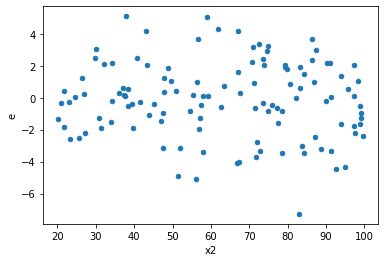

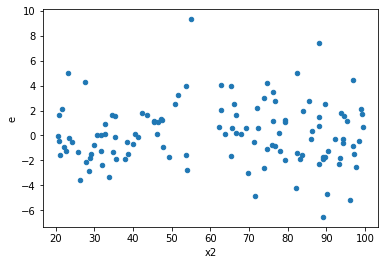

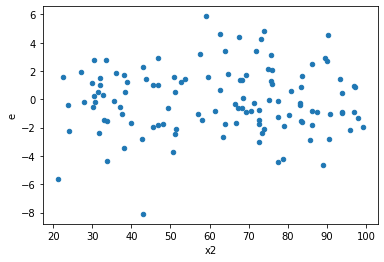

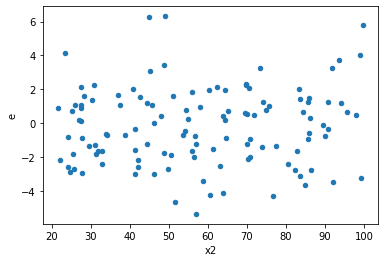

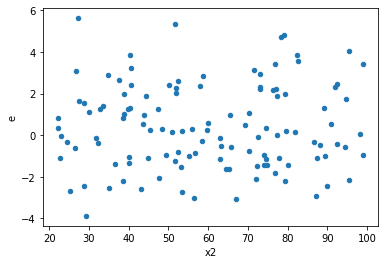

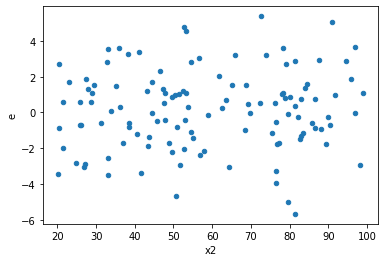

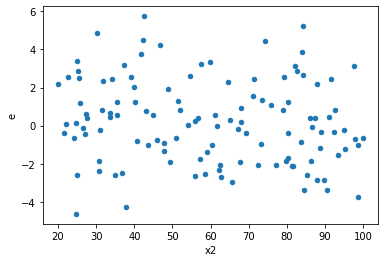

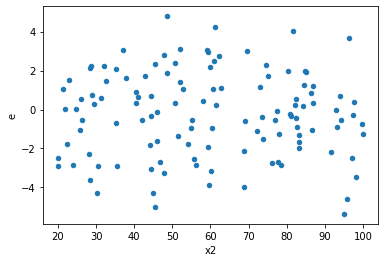

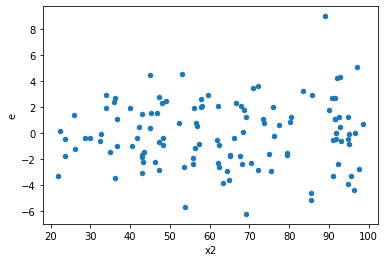

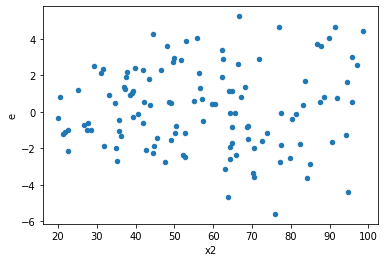

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,51.0,63.0,220.10224682564206,355.1288215527255,4.31573032991455,5.636965421471833,1.3061440336990293,0.31212508903055625,0.8439374554847219,0.15606254451527812,Reject005=1 : Homoscedasticity
7.0,61.0,53.0,263.7239979598662,296.7149383208844,4.3233442288502655,5.598395062658197,1.2949223486067436,0.33781162258529385,0.8310941887073531,0.16890581129264692,Reject005=1 : Homoscedasticity
8.0,61.0,53.0,234.35163402949857,257.9460081242568,3.8418300660573537,4.866905813665223,1.2668196484442231,0.3804770421724226,0.8097614789137887,0.1902385210862113,Reject005=1 : Homoscedasticity
9.0,60.0,54.0,314.7037149818246,321.13059814533364,5.245061916363743,5.946862928617289,1.1338022359781952,0.641233883980445,0.6793830580097775,0.3206169419902225,Reject005=1 : Homoscedasticity
10.0,64.0,50.0,289.74742512933943,295.6463980854498,4.527303517645929,5.912927961708996,1.3060595426532289,0.32800130617039636,0.8359993469148018,0.16400065308519818,Reject005=1 : Homoscedasticity
13.0,51.0,63.0,249.90770000664452,343.6687900070567,4.900150980522442,5.45506015884217,1.1132432817938531,0.6810916922359294,0.6594541538820353,0.3405458461179647,Reject005=1 : Homoscedasticity
16.0,59.0,55.0,270.3097385733016,258.33354015915046,4.581520992767824,4.696973457439099,1.0251995930725895,0.9280046170358065,0.5359976914820967,0.46400230851790325,Reject005=1 : Homoscedasticity
17.0,58.0,56.0,258.79345707244113,261.2767025982598,4.461956156421399,4.665655403540354,1.0456524537619676,0.8680226014937151,0.5659886992531424,0.43401130074685756,Reject005=1 : Homoscedasticity
21.0,55.0,59.0,252.98438237051073,310.2616337445689,4.599716043100195,5.2586717583825235,1.1432600858635165,0.6127216199025627,0.6936391900487187,0.30636080995128134,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,59.0,55.0,278.47788012865243,221.5482182872572,4.71996406997716,4.028149423404677,0.8534279845533165,0.5493964598485409,Reject005=1 : Homoscedasticity
1.0,62.0,52.0,362.1845620070532,204.06829165900558,5.841686483984729,3.924390224211646,0.6717906267257846,0.13337776468971876,Reject005=1 : Homoscedasticity
2.0,61.0,53.0,289.98404322683564,239.9134662001108,4.75383677421042,4.526669173586996,0.9522138408588599,0.8493868514105508,Reject005=1 : Homoscedasticity
3.0,51.0,63.0,220.10224682564206,355.1288215527255,4.31573032991455,5.636965421471833,1.3061440336990293,0.31212508903055625,Reject005=1 : Homoscedasticity
4.0,54.0,60.0,282.7948929284952,287.7729912758152,5.2369424616388,4.796216521263586,0.9158428904645064,0.7452034467983034,Reject005=1 : Homoscedasticity
5.0,64.0,50.0,421.110504605934,205.63649994795324,6.579851634467719,4.112729998959065,0.6250490478257974,0.07629661730820116,Reject005=1 : Homoscedasticity
6.0,65.0,49.0,288.2351687210297,214.41843605624965,4.434387211092765,4.375886450127544,0.9868074757164013,0.9505773937888865,Reject005=1 : Homoscedasticity
7.0,61.0,53.0,263.7239979598662,296.7149383208844,4.3233442288502655,5.598395062658197,1.2949223486067436,0.33781162258529385,Reject005=1 : Homoscedasticity
8.0,61.0,53.0,234.35163402949857,257.9460081242568,3.8418300660573537,4.866905813665223,1.2668196484442231,0.3804770421724226,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      894
Reject005=0 : Heteroscedasticity    106
Name: Result_test, dtype: int64